In [2]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display
# 

In [9]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# # Define the lat, long of the location and the year
# # Location BERKELEY    Latitude  37.87159000    Longitude  -122.27275000  
# lat, lon, year = 33.2164, -97.1292, 2010
lat, lon, year = 37.87159000, -122.27275000, 2010
# # You must request an NSRDB api key from the link above
api_key = 'enter-your-api-key-here-you-can-request-it-online'
# # Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
# attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle'
# # Choose year of data
year = '2010'
# # Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# # Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# # Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# # NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# # local time zone.
utc = 'false'
# # Your full name, use '+' instead of spaces.
your_name = 'Thomas+Schutzius'
# # Your reason for using the NSRDB.
reason_for_use = 'beta+testing'
# # Your affiliation
your_affiliation = 'UC+Berkeley'
# # Your email address
your_email = 'tschutzius@berkeley.edu'
# # Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# # Declare url string
url = 'https://developer.nrel.gov/api/wind-toolkit/v2/wind/wtk-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key)

In [12]:
# # Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# # See metadata for specified properties, e.g., timezone and elevation
# timezone, elevation = info['Local Time Zone'], info['Elevation']
# 

In [13]:
info

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,SiteID,161972,Site Timezone,-8,Data Timezone,-8.1,Longitude,-122.281707764,Latitude,37.8766555786
Year,Month,Day,Hour,Minute,surface air pressure (Pa),air pressure at 100m (Pa),air pressure at 200m (Pa),relative humidity at 2m (%),surface precipitation rate (mm/h),wind speed at 10m (m/s),wind speed at 40m (m/s),wind speed at 60m (m/s),wind speed at 80m (m/s),wind speed at 100m (m/s),wind speed at 120m (m/s),wind speed at 140m (m/s),wind speed at 160m (m/s),wind speed at 200m (m/s),wind direction at 10m (deg),wind direction at 40m (deg),wind direction at 60m (deg),wind direction at 80m (deg),wind direction at 100m (deg),wind direction at 120m (deg),wind direction at 140m (deg),wind direction at 160m (deg),wind direction at 200m (deg),air temperature at 10m (C),air temperature at 40m (C),air temperature at 60m (C),air temperature at 80m (C),air temperature at 100m (C),air temperature at 120m (C),air temperature at 140m (C),air temperature at 160m (C),air temperature at 200m (C),density - DEPRECATED,power - DEPRECATED


In [14]:
df = pd.read_csv('https://developer.nrel.gov/api/wind-toolkit/v2/wind/wtk-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&reason={reason}&api_key={api}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key), skiprows=1)

# # Set the time index in the pandas dataframe:
df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

# # take a look
print('shape:', df.shape)
df.head()

shape: (17520, 39)


/tmp/ipykernel_372/2974917065.py:4: FutureWarning: Non-integer 'periods' in pd.date_range, pd.timedelta_range, pd.period_range, and pd.interval_range are deprecated and will raise in a future version.
  df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


,Year,Month,Day,Hour,Minute,surface air pressure (Pa),air pressure at 100m (Pa),air pressure at 200m (Pa),relative humidity at 2m (%),surface precipitation rate (mm/h),...,air temperature at 40m (C),air temperature at 60m (C),air temperature at 80m (C),air temperature at 100m (C),air temperature at 120m (C),air temperature at 140m (C),air temperature at 160m (C),air temperature at 200m (C),density - DEPRECATED,power - DEPRECATED
2010-01-01 00:00:00,2010,1,1,0,0,102130,100900,99710,48.83,0.0,...,12.52,12.49,12.39,12.23,12.06,11.92,11.85,11.95,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,102110,100890,99700,49.37,0.0,...,12.49,12.42,12.31,12.17,12.03,12.01,12.05,12.36,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,102110,100890,99700,52.48,0.0,...,12.51,12.49,12.40,12.48,12.61,12.86,13.01,12.78,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,102100,100870,99680,54.80,0.0,...,12.55,12.54,12.47,12.49,12.54,12.62,12.61,12.18,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,102080,100860,99670,60.69,0.0,...,12.65,12.67,12.61,12.55,12.48,12.46,12.42,12.21,NaN,NaN


In [15]:
print(df.columns.values)

['Year' 'Month' 'Day' 'Hour' 'Minute' 'surface air pressure (Pa)'
 'air pressure at 100m (Pa)' 'air pressure at 200m (Pa)'
 'relative humidity at 2m (%)' 'surface precipitation rate (mm/h)'
 'wind speed at 10m (m/s)' 'wind speed at 40m (m/s)'
 'wind speed at 60m (m/s)' 'wind speed at 80m (m/s)'
 'wind speed at 100m (m/s)' 'wind speed at 120m (m/s)'
 'wind speed at 140m (m/s)' 'wind speed at 160m (m/s)'
 'wind speed at 200m (m/s)' 'wind direction at 10m (deg)'
 'wind direction at 40m (deg)' 'wind direction at 60m (deg)'
 'wind direction at 80m (deg)' 'wind direction at 100m (deg)'
 'wind direction at 120m (deg)' 'wind direction at 140m (deg)'
 'wind direction at 160m (deg)' 'wind direction at 200m (deg)'
 'air temperature at 10m (C)' 'air temperature at 40m (C)'
 'air temperature at 60m (C)' 'air temperature at 80m (C)'
 'air temperature at 100m (C)' 'air temperature at 120m (C)'
 'air temperature at 140m (C)' 'air temperature at 160m (C)'
 'air temperature at 200m (C)' 'density - DEPRE

In [22]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Wind Speed (m/s)')

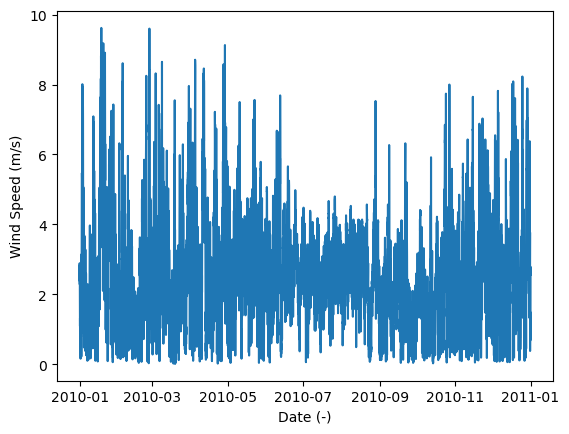

In [33]:
plt.plot(df['wind speed at 10m (m/s)'])
plt.xlabel('Date (-)')
plt.ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Speed (m/s)')

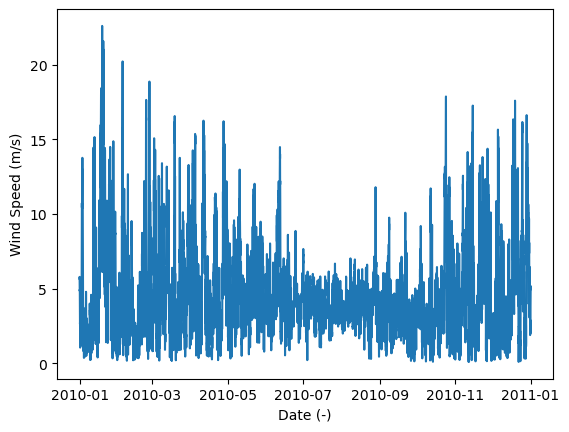

In [34]:
plt.plot(df['wind speed at 200m (m/s)'])
plt.xlabel('Date (-)')
plt.ylabel('Wind Speed (m/s)')